In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('temp.csv')
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


In [4]:
df['Date']=pd.to_datetime(df['Date'])

In [5]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

There are many missing values

In [6]:
df['Month']=df['Date'].dt.month
df['Year']=df['Date'].dt.year
df['Month'],df['Year']

(0       6.0
 1       6.0
 2       6.0
 3       6.0
 4       6.0
        ... 
 7747    8.0
 7748    8.0
 7749    8.0
 7750    NaN
 7751    NaN
 Name: Month, Length: 7752, dtype: float64,
 0       2013.0
 1       2013.0
 2       2013.0
 3       2013.0
 4       2013.0
          ...  
 7747    2017.0
 7748    2017.0
 7749    2017.0
 7750       NaN
 7751       NaN
 Name: Year, Length: 7752, dtype: float64)

In [7]:
df['Month'].nunique(),df['Year'].nunique()


(12, 5)

In [8]:
df=df.drop('Date',axis=1)

In [9]:
df.shape

(7752, 26)

In [10]:
df=df.dropna()

In [11]:
df.isnull().sum()


station             0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
Month               0
Year                0
dtype: int64

In [12]:
df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Month,Year
count,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,...,7588.000000,7588.000000,7588.00000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000
mean,13.014101,29.748366,23.195809,56.724969,88.360823,29.620128,23.511786,7.094097,62.492606,0.368510,...,0.265373,37.544792,126.99142,61.918136,1.259755,5343.724208,30.241526,22.910820,7.068134,2014.991697
std,7.217858,2.967401,2.400880,14.626559,7.199456,2.943496,2.342579,2.177034,33.686158,0.262260,...,1.179661,0.050428,0.07922,54.323529,1.372748,429.782561,3.111807,2.482256,2.242389,1.410877
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,0.000000,37.456200,126.82600,12.370000,0.098500,4329.520508,17.400000,11.300000,1.000000,2013.000000
25%,7.000000,27.800000,21.600000,45.960243,84.203724,27.673756,22.086820,5.675358,37.206201,0.146546,...,0.000000,37.510200,126.93700,28.700000,0.271300,5001.485717,28.200000,21.300000,7.000000,2014.000000
50%,13.000000,29.900000,23.400000,55.023199,89.784122,29.709537,23.758249,6.547838,56.898324,0.315706,...,0.000000,37.550700,126.99500,45.716000,0.618000,5441.987305,30.400000,23.100000,7.000000,2015.000000
75%,19.000000,32.000000,24.800000,67.115099,93.742725,31.711109,25.155660,8.028960,84.235666,0.574174,...,0.000017,37.577600,127.04200,59.832400,1.767800,5729.485840,32.600000,24.600000,8.000000,2016.000000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,16.655469,37.645000,127.13500,212.335000,5.178200,5992.895996,38.900000,29.800000,12.000000,2017.000000


We can see that there is few outliers in the data

In [13]:
#Checking for duplicated data
duplicate=df.duplicated()
print(duplicate.sum())

0


##### Lets see the distribution of the data

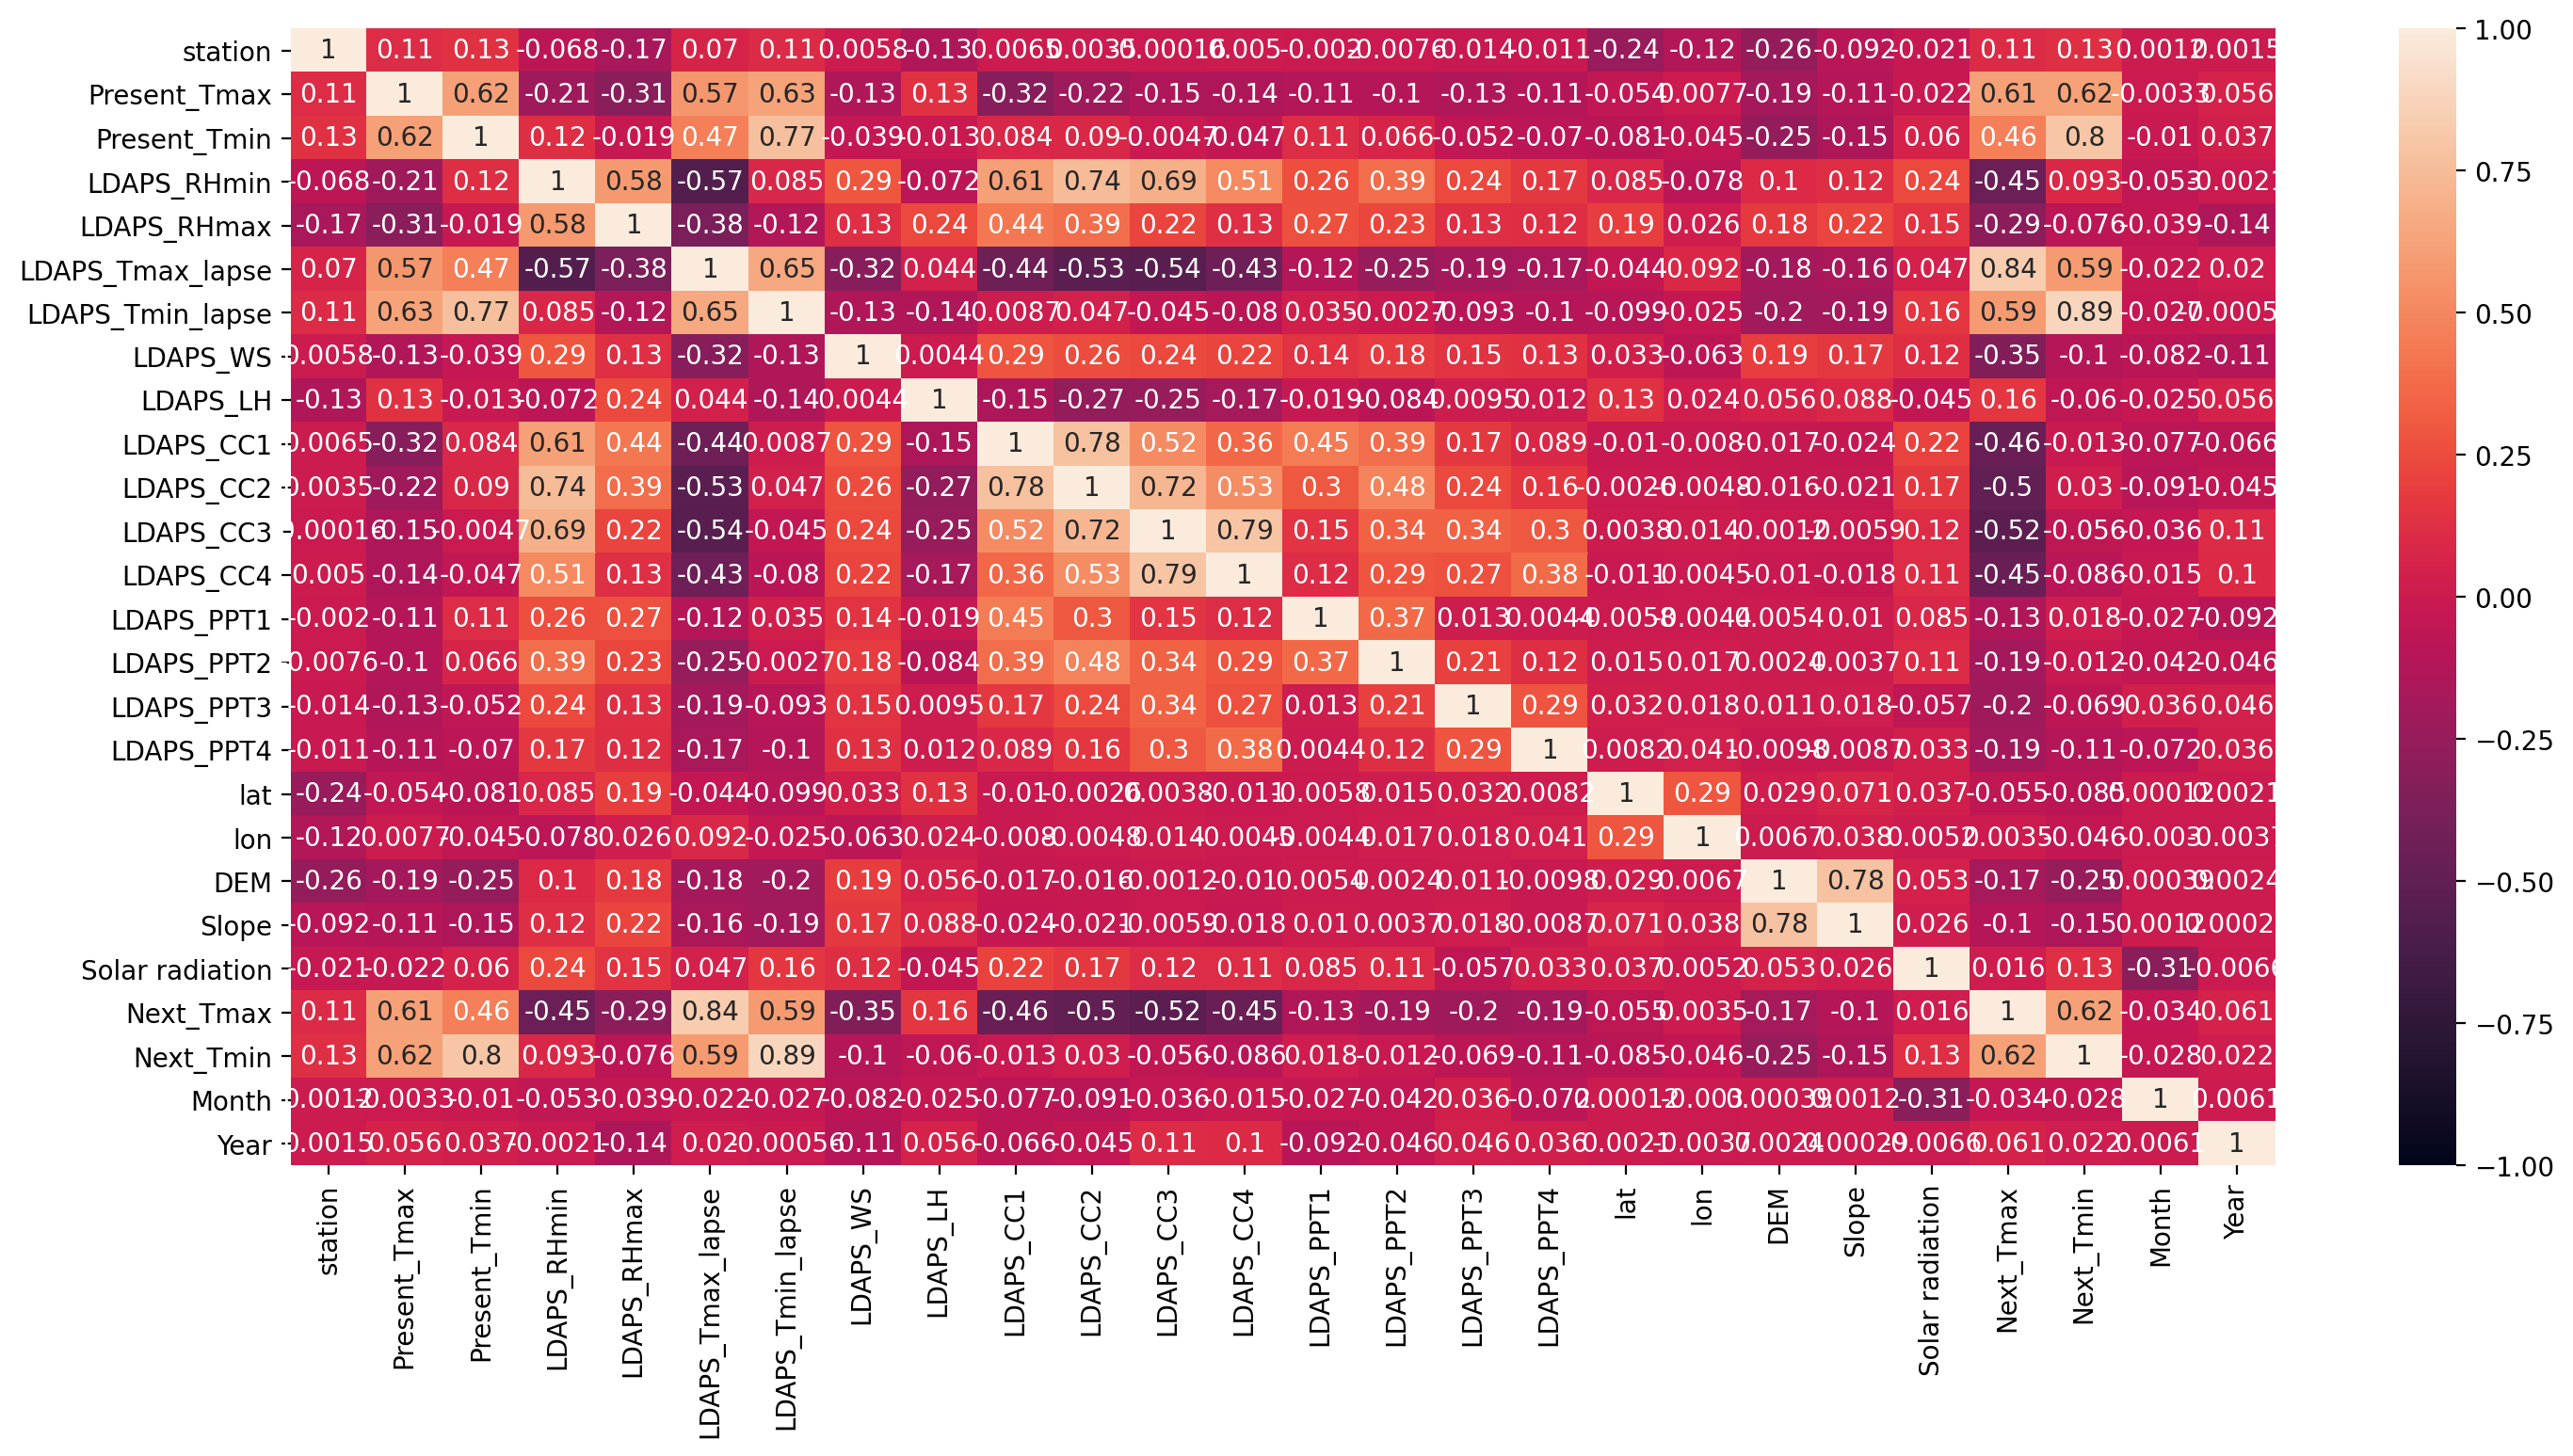

In [14]:
#before that lets check the correlation of variables
f=plt.figure(figsize=(17,8),dpi=200)
sns.heatmap(df.corr(),annot=True,vmax=1,vmin=-1)

1. We can see that Next_Tmax is highly correlated with LDAPS_Tmax_lapse, Present_Tmax.
2. And Next_Tmin is highly correlated with LDAPS_Tmin_lapse, Present_Tmin
3. We can drop station, lat,lon since it doesnt make any difference 

In [15]:
df=df.drop(['station','lat','lon'],axis=1)

In [16]:
df.columns

Index(['Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'DEM', 'Slope',
       'Solar radiation', 'Next_Tmax', 'Next_Tmin', 'Month', 'Year'],
      dtype='object')

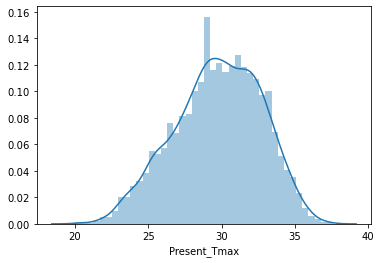

In [17]:
#univariate analysis
sns.distplot(df['Present_Tmax'])

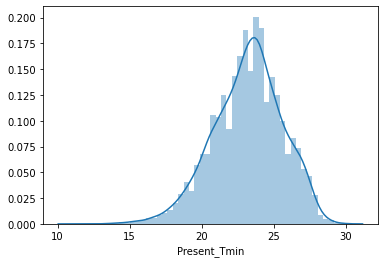

In [18]:
sns.distplot(df['Present_Tmin'])

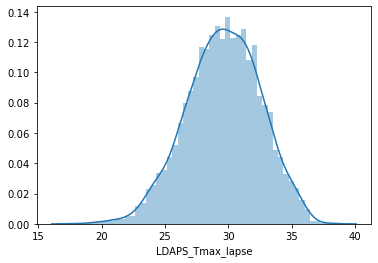

In [19]:
sns.distplot(df['LDAPS_Tmax_lapse'])

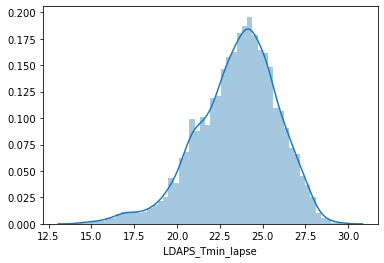

In [20]:
sns.distplot(df['LDAPS_Tmin_lapse'])

We can see that the data is negatively skewed

In [21]:
df.skew()

Present_Tmax       -0.257069
Present_Tmin       -0.353822
LDAPS_RHmin         0.301396
LDAPS_RHmax        -0.845264
LDAPS_Tmax_lapse   -0.222349
LDAPS_Tmin_lapse   -0.574035
LDAPS_WS            1.553926
LDAPS_LH            0.662971
LDAPS_CC1           0.456716
LDAPS_CC2           0.473929
LDAPS_CC3           0.639649
LDAPS_CC4           0.663815
LDAPS_PPT1          5.305906
LDAPS_PPT2          5.710360
LDAPS_PPT3          6.356670
LDAPS_PPT4          6.681256
DEM                 1.721617
Slope               1.559050
Solar radiation    -0.524325
Next_Tmax          -0.334842
Next_Tmin          -0.393662
Month              -0.703092
Year                0.013575
dtype: float64

In [22]:
skewness, skew_name = [], []
for i in df:
    skewness.append(round(df[i].skew(),2))
    skew_name.append(i)
skew_df = pd.DataFrame(skewness, index=[skew_name], columns=['Skewness']).sort_values(by='Skewness', ascending=False)
skew_df[skew_df['Skewness']<-0.5],skew_df[skew_df['Skewness']>0.5] 

(                  Skewness
 Solar radiation      -0.52
 LDAPS_Tmin_lapse     -0.57
 Month                -0.70
 LDAPS_RHmax          -0.85,
             Skewness
 LDAPS_PPT4      6.68
 LDAPS_PPT3      6.36
 LDAPS_PPT2      5.71
 LDAPS_PPT1      5.31
 DEM             1.72
 Slope           1.56
 LDAPS_WS        1.55
 LDAPS_CC4       0.66
 LDAPS_LH        0.66
 LDAPS_CC3       0.64)

In [23]:
#outliers removal
from scipy import stats
from scipy.stats import zscore

df_new = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)] # remove outliers
df_new = df.apply(zscore) # Normalization
print(df_new.describe())

       Present_Tmax  Present_Tmin   LDAPS_RHmin   LDAPS_RHmax  \
count  7.588000e+03  7.588000e+03  7.588000e+03  7.588000e+03   
mean   6.087791e-16  5.018536e-16 -1.854664e-16 -1.288783e-15   
std    1.000066e+00  1.000066e+00  1.000066e+00  1.000066e+00   
min   -3.285370e+00 -4.955097e+00 -2.525046e+00 -4.087320e+00   
25%   -6.566334e-01 -6.647206e-01 -7.360197e-01 -5.774566e-01   
50%    5.110336e-02  8.505394e-02 -1.163556e-01  1.977084e-01   
75%    7.588401e-01  6.682119e-01  7.104074e-01  7.475921e-01   
max    2.646138e+00  2.792573e+00  2.857987e+00  1.616802e+00   

       LDAPS_Tmax_lapse  LDAPS_Tmin_lapse      LDAPS_WS      LDAPS_LH  \
count      7.588000e+03      7.588000e+03  7.588000e+03  7.588000e+03   
mean       1.596128e-16      4.772730e-16  2.958083e-17  9.580575e-17   
std        1.000066e+00      1.000066e+00  1.000066e+00  1.000066e+00   
min       -4.075414e+00     -3.944264e+00 -1.934648e+00 -2.259113e+00   
25%       -6.612885e-01     -6.083296e-01 -6.5172

Standard deviation is reduced to 1, which implies that the data is normally spread

In [24]:
skew_df[skew_df['Skewness']<-0.5],skew_df[skew_df['Skewness']>0.5]

(                  Skewness
 Solar radiation      -0.52
 LDAPS_Tmin_lapse     -0.57
 Month                -0.70
 LDAPS_RHmax          -0.85,
             Skewness
 LDAPS_PPT4      6.68
 LDAPS_PPT3      6.36
 LDAPS_PPT2      5.71
 LDAPS_PPT1      5.31
 DEM             1.72
 Slope           1.56
 LDAPS_WS        1.55
 LDAPS_CC4       0.66
 LDAPS_LH        0.66
 LDAPS_CC3       0.64)

In [25]:
df1=np.sqrt(df)

<ipython-input-25-8a54dd44acfc>:1: RuntimeWarning: invalid value encountered in sqrt
  df1=np.sqrt(df)


In [26]:
df1.skew()

Present_Tmax       -0.374583
Present_Tmin       -0.527288
LDAPS_RHmin         0.018839
LDAPS_RHmax        -0.952601
LDAPS_Tmax_lapse   -0.372797
LDAPS_Tmin_lapse   -0.751497
LDAPS_WS            1.035809
LDAPS_LH            0.043247
LDAPS_CC1          -0.246853
LDAPS_CC2          -0.288132
LDAPS_CC3          -0.110855
LDAPS_CC4          -0.027281
LDAPS_PPT1          2.732743
LDAPS_PPT2          3.105387
LDAPS_PPT3          3.644210
LDAPS_PPT4          3.902692
DEM                 1.151683
Slope               0.869483
Solar radiation    -0.572007
Next_Tmax          -0.467777
Next_Tmin          -0.577792
Month              -1.521926
Year                0.013204
dtype: float64

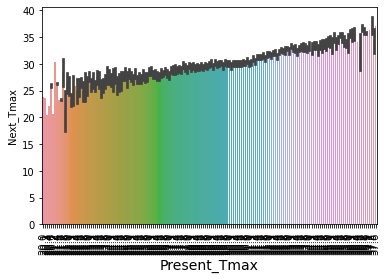

In [27]:
#bivariate analysis

sns.barplot('Present_Tmax' ,'Next_Tmax', data=df)
plt.xlabel('Present_Tmax', fontsize=14)
plt.xticks(rotation ='vertical')
plt.show()

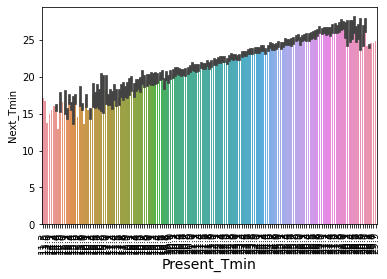

In [28]:
sns.barplot('Present_Tmin' ,'Next_Tmin', data=df)
plt.xlabel('Present_Tmin', fontsize=14)
plt.xticks(rotation ='vertical')
plt.show()

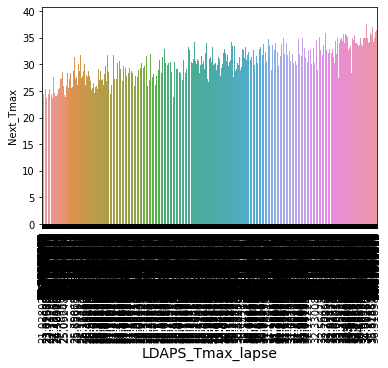

In [29]:
sns.barplot('LDAPS_Tmax_lapse' ,'Next_Tmax', data=df)
plt.xlabel('LDAPS_Tmax_lapse', fontsize=14)
plt.xticks(rotation ='vertical')
plt.show()

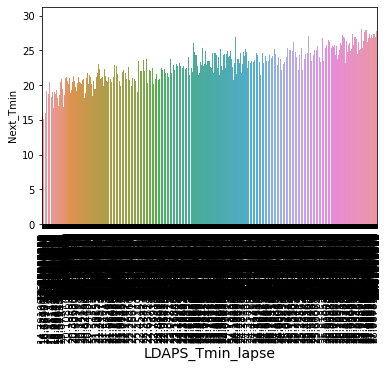

In [30]:
sns.barplot('LDAPS_Tmin_lapse' ,'Next_Tmin', data=df)
plt.xlabel('LDAPS_Tmin_lapse', fontsize=14)
plt.xticks(rotation ='vertical')
plt.show()

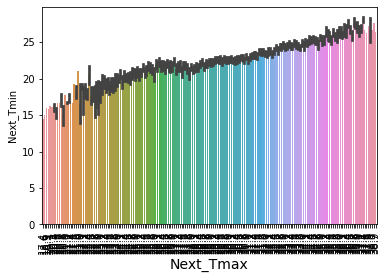

In [31]:
sns.barplot('Next_Tmax' ,'Next_Tmin', data=df)
plt.xlabel('Next_Tmax', fontsize=14)
plt.xticks(rotation ='vertical')
plt.show()

In [32]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()

for x in df1.columns.drop('Next_Tmax','Next_Tmin'):
    if abs(df1.loc[:,x].skew())>0.55:
        df1.loc[:,x]=pt.fit_transform(df1.loc[:,x].values.reshape(-1,1))

In [33]:
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()
for i in df.columns:   
    df[i] = encoder.fit_transform(df[i]) 
df.dtypes

Present_Tmax        int64
Present_Tmin        int64
LDAPS_RHmin         int64
LDAPS_RHmax         int64
LDAPS_Tmax_lapse    int64
LDAPS_Tmin_lapse    int64
LDAPS_WS            int64
LDAPS_LH            int64
LDAPS_CC1           int64
LDAPS_CC2           int64
LDAPS_CC3           int64
LDAPS_CC4           int64
LDAPS_PPT1          int64
LDAPS_PPT2          int64
LDAPS_PPT3          int64
LDAPS_PPT4          int64
DEM                 int64
Slope               int64
Solar radiation     int64
Next_Tmax           int64
Next_Tmin           int64
Month               int64
Year                int64
dtype: object

In [34]:
np.any(np.isnan(df1))

True

In [35]:
df1=df1.replace(np.nan, 0)

In [36]:
X=df1.drop(['Next_Tmax','Next_Tmin'],axis=1)

In [37]:
df2=pd.DataFrame({})
df2['Next_Tmin']=df1['Next_Tmin']
df2['Next_Tmax']=df1['Next_Tmax']

In [38]:
y=df2

In [39]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [81]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import GridSearchCV

In [86]:
def model(mod):
    md=mod()
    md.fit(X_train,y_train)
    predict=md.predict(X_test)
    r2score=r2_score(y_test,predict)
    print("model: {}".format(mod))
    print("r2score is {}".format(r2score))
    print("MAE score is {}".format(mean_absolute_error(y_test,predict)))
    print("RMSE score is {}".format(np.sqrt(mean_squared_error(y_test,predict))))

In [87]:
model(LinearRegression)

model: <class 'sklearn.linear_model._base.LinearRegression'>
r2score is 0.7932969404983252
MAE score is 0.21538810076719078
RMSE score is 0.30913708888430746


In [69]:
model(KNeighborsRegressor)

model: <class 'sklearn.neighbors._regression.KNeighborsRegressor'>
r2score is 0.8160795959671596
MAE score is 0.20786197807019158
RMSE score is 0.3072085203348029


In [70]:
model(RandomForestRegressor)

model: <class 'sklearn.ensemble._forest.RandomForestRegressor'>
r2score is 0.8868536511124874
MAE score is 0.157208499721301
RMSE score is 0.22977262538644438


In [48]:
model(DecisionTreeRegressor)

model: <class 'sklearn.tree._classes.DecisionTreeRegressor'>
r2score is 0.7366827363142403
MAE score is 0.22414629734071229
RMSE score is 0.33763797627049147


In [58]:
paramgrid = {'max_depth': list(range(1,20,2)), 'n_estimators': list(range(1,200,20))}
grid=GridSearchCV(RandomForestRegressor(),paramgrid)

In [61]:
grid.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161,
                                          181]})

In [71]:
grid.best_params_

{'max_depth': 19, 'n_estimators': 121}

In [73]:
predict=grid.predict(X_test)
r2score=r2_score(y_test,predict)
print("r2score is {}".format(r2score))
print("MAE score is {}".format(mean_absolute_error(y_test,predict)))
print("RMSE score is {}".format(np.sqrt(mean_squared_error(y_test,predict))))

r2score is 0.8884029504837962
MAE score is 0.15610995758802262
RMSE score is 0.22830766981655093
